In [1]:
import os
import re
import glob
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()
# sns.set_style("whitegrid", {'grid.linestyle': '--'})
# sns.set_context("paper", 1.5, {"lines.linewidth": 4})
# sns.set_palette("winter_r", 8, 1)
# sns.set_context("paper", 1.5)

In [5]:
# expt_name = "C:\Users\xiang-lab\Documents\DRL-Trading\experiments\DQN_2021-11-15_10-28\ExperimentCV_BaseTradingEnv_5690e_00000_0_2021-11-15_10-28-29"
stats_name = "best-stats-eval"
expt_name = "./experiments/DQN_2021-11-15_10-28"
trial_names = glob.glob(os.path.join(expt_name, "*"))

# trial_name = "C:\Users\xiang-lab\Documents\DRL-Trading\experiments\DQN_2021-11-15_10-28\ExperimentCV_BaseTradingEnv_5690e_00000_0_2021-11-15_10-28-29"

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (Temp/ipykernel_8104/885667500.py, line 3)

In [ ]:
last_stats_folders = glob.glob(os.path.join(expt_name, "*", "last-stats-eval"))
best_stats_folders = glob.glob(os.path.join(expt_name, "*", "best-stats-eval"))
best_stats_folders

['./ray_results/compare-algo-11\\A2C_11-12_09-53va7y3ydm\\best-stats-eval',
 './ray_results/compare-algo-11\\DQN_11-12_09-27kh141lvy\\best-stats-eval',
 './ray_results/compare-algo-11\\PPO_11-12_09-595x1j3bcn\\best-stats-eval',
 './ray_results/compare-algo-11\\SAC_11-12_10-22tdcpju8j\\best-stats-eval']

In [ ]:
summary_equity_curve = {}
summary_performance = {}
for folder in best_stats_folders:
    print(folder)
    algo = folder.split('\\')[1].split('_')[0]
    equity_curve = pd.read_csv(os.path.join(folder, "equity_curve.csv"), index_col=0)
    performance = pd.read_csv(os.path.join(folder, "performance.csv"))
    summary_equity_curve[algo] = equity_curve
    summary_performance[algo] = performance

./ray_results/compare-algo-11\A2C_11-12_09-53va7y3ydm\best-stats-eval
./ray_results/compare-algo-11\DQN_11-12_09-27kh141lvy\best-stats-eval
./ray_results/compare-algo-11\PPO_11-12_09-595x1j3bcn\best-stats-eval
./ray_results/compare-algo-11\SAC_11-12_10-22tdcpju8j\best-stats-eval


In [ ]:
for algo, performance in summary_performance.items():
    print(algo)
    print(performance)

A2C
                   Start  2018-01-04 00:00:00
0                    End  2020-12-30 00:00:00
1               Duration   1091 days 00:00:00
2             Return [%]   -39.59881669921851
3  Buy & Hold Return [%]    16.75225282152638
4      Return (Ann.) [%]  -15.993671104046214
5  Volatility (Ann.) [%]   13.440338885075453
6           Sharpe Ratio  -1.2303487800812691
7      Max. Drawdown [%]   -40.84203094088698
DQN
                   Start  2018-01-04 00:00:00
0                    End  2020-12-30 00:00:00
1               Duration   1091 days 00:00:00
2             Return [%]    51.65825224804706
3  Buy & Hold Return [%]    16.75225282152638
4      Return (Ann.) [%]   15.483941061322316
5  Volatility (Ann.) [%]   10.276043460310298
6           Sharpe Ratio   1.4545552881497492
7      Max. Drawdown [%]  -10.298966059109071
PPO
                   Start  2018-01-04 00:00:00
0                    End  2020-12-30 00:00:00
1               Duration   1091 days 00:00:00
2             Return [

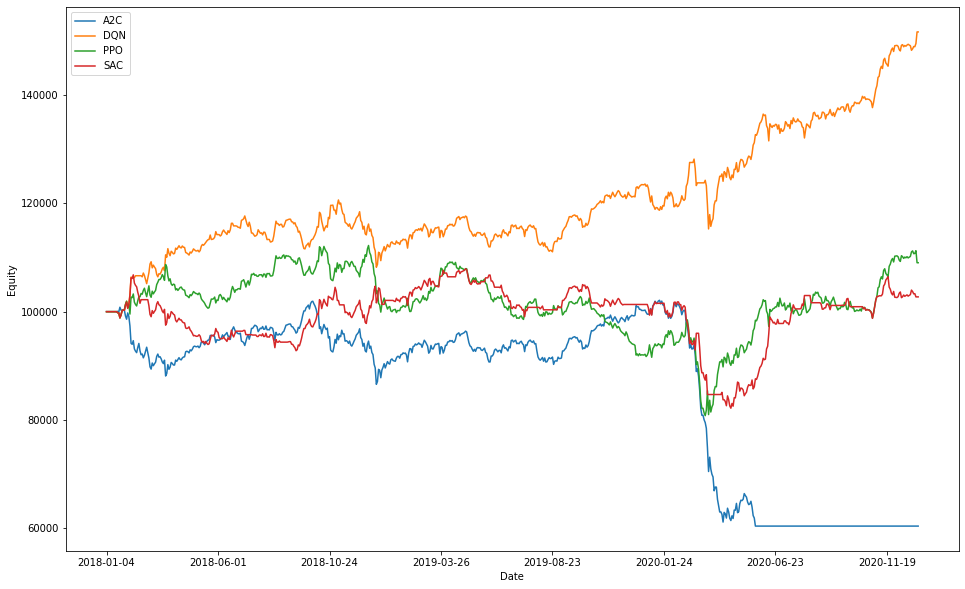

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
ax.set_ylabel('Equity')
ax.set_xlabel('Date')
for algo, equity_curve in summary_equity_curve.items():
    algo_name = algo
    equity_curve["Equity"].plot(ax=ax, label=algo, legend=True)
    # ax.plot(equity_curve["Equity"], label=algo)

In [ ]:
folders = glob.glob(os.path.join(expt_name, "*"))
summary_progress = {}
for folder in folders:
    print(folder)
    algo = folder.split('\\')[1].split('_')[0]
    path = os.path.join(folder, "progress.csv")
    progress = pd.read_csv(path)
    summary_progress[algo] = progress[["episode_reward_mean", "evaluation/episode_reward_mean", "timesteps_total"]]

./ray_results/compare-algo-11\A2C_11-12_09-53va7y3ydm
./ray_results/compare-algo-11\DQN_11-12_09-27kh141lvy
./ray_results/compare-algo-11\PPO_11-12_09-595x1j3bcn
./ray_results/compare-algo-11\SAC_11-12_10-22tdcpju8j


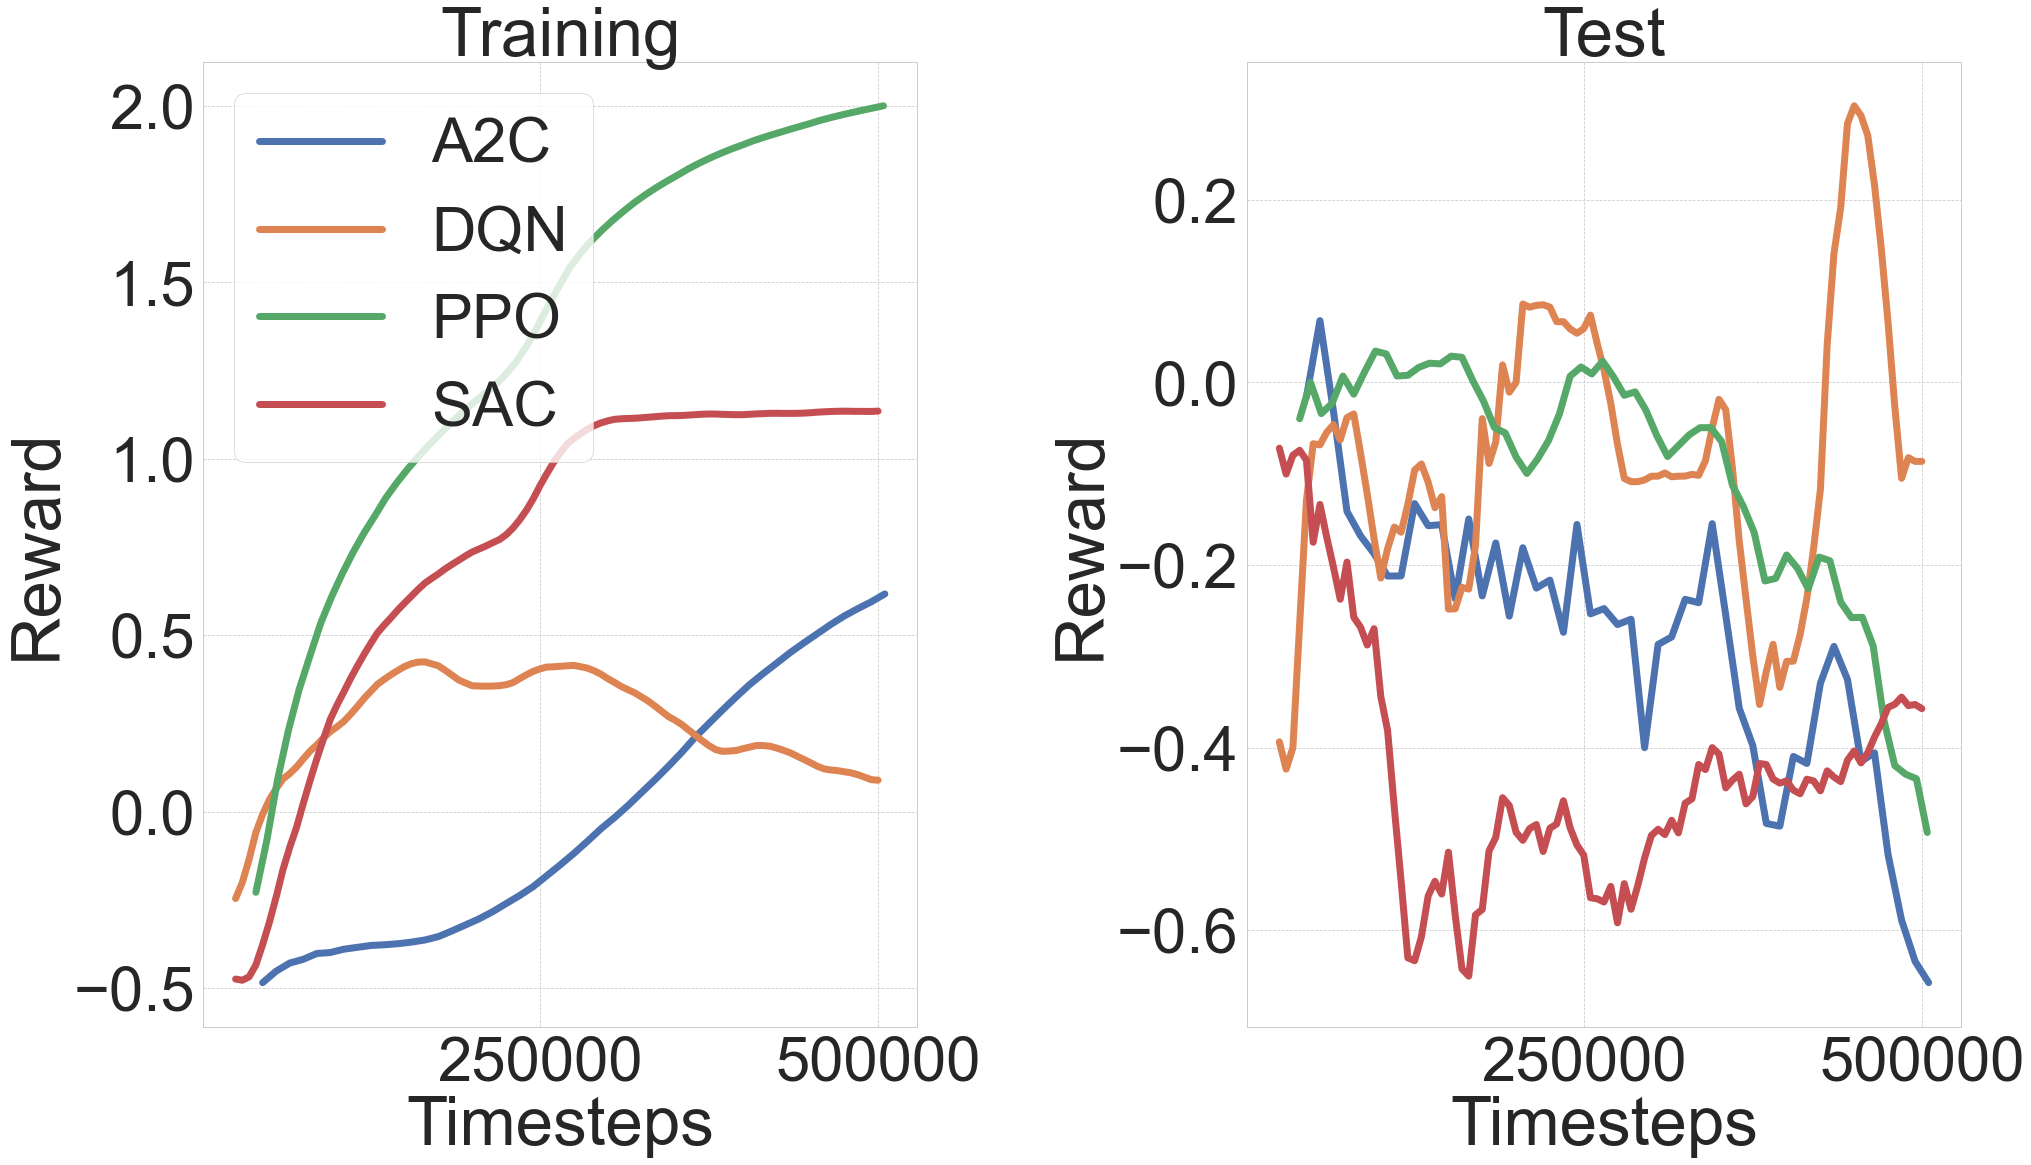

In [ ]:
# sns.set('paper','whitegrid', font_scale=5, rc={"lines.linewidth": 5})
sns.set('paper','whitegrid', font_scale=7, rc={"lines.linewidth": 7, 'grid.linestyle': '--'})
fig, axes = plt.subplots(1, 2, figsize=(30, 18))
# axes[0].text(0.95, 0.01, "Training", transform=axes[0].transAxes)
axes[0].set_title("Training")
axes[0].set_ylabel("Reward")
axes[0].set_xlabel("Timesteps")
axes[0].set_xticks([0, 250000, 500000])


# axes[1].text(0.01, 0.95, "Test", transform=axes[1].transAxes)
axes[1].set_title("Test")
axes[1].set_ylabel("Reward")
axes[1].set_xlabel("Timesteps")
axes[1].set_xticks([0, 250000, 500000])
for algo, progress in summary_progress.items():
    train_rewards = progress["episode_reward_mean"].rolling(5).mean()
    test_rewards = progress["evaluation/episode_reward_mean"].rolling(5).mean()
    axes[0].plot(progress["timesteps_total"], train_rewards, label=algo)
    axes[1].plot(progress["timesteps_total"], test_rewards, label=algo)
    # progress["episode_reward_mean"].ewm(5).mean().plot(x=progress["timesteps_total"], ax=axes[0])
    # progress["evaluation/episode_reward_mean"].ewm(5).mean().plot(x=progress["timesteps_total"], ax=axes[1], label=algo, legend=True).legend(loc='lower right')

# axes[0].legend()
axes[0].legend(loc='upper left')

# axes[1].legend()
# axes[1].legend(loc='upper left')
plt.tight_layout()